HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16091161574899407038\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2110245841698607855\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16091161574899407038\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

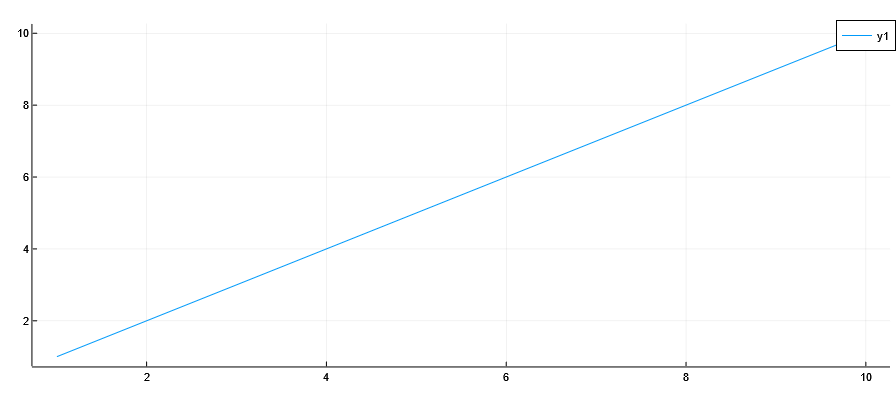

In [1]:
using Plots
plotlyjs()
plot(1:10)

In [2]:
include("../src/test.jl")

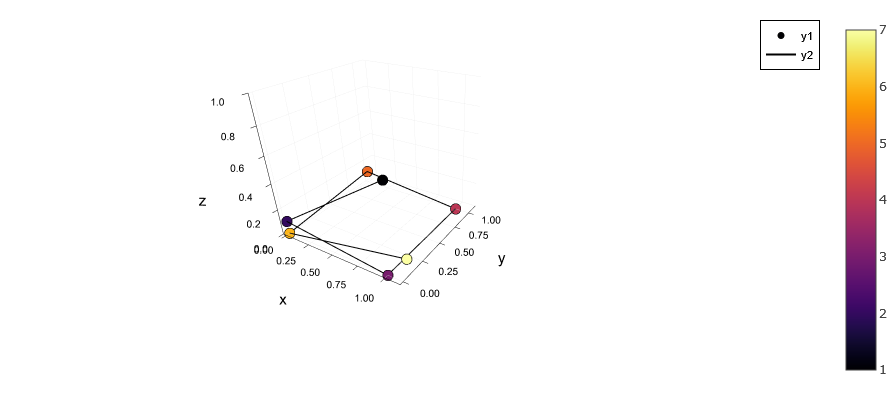

In [3]:
Q = fourKnot(1.1)
fig = Plots.plot(zlim=(0,1))
plotChain!(Q)
display(fig)

In [4]:
plotlyjs()

Plots.PlotlyJSBackend()

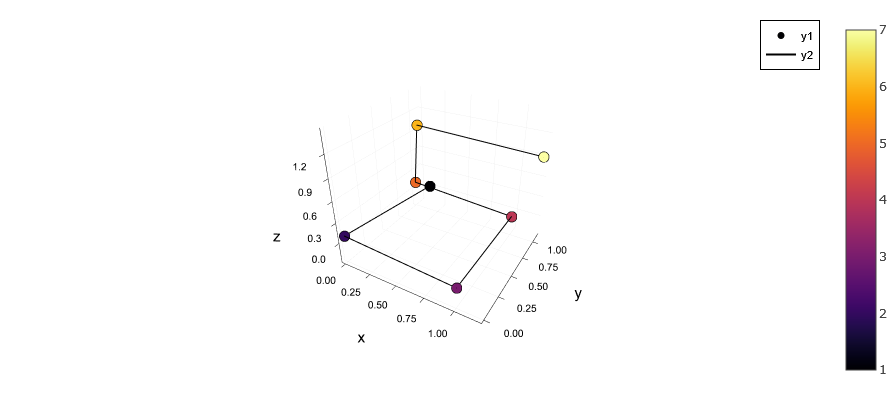

In [5]:
newQ = copy(Q)
newQ = dihedralRotate(newQ,3,pi/2)
fig = Plots.plot(zlim=(-0.3,1.5))
plotChain!(newQ)
display(fig)

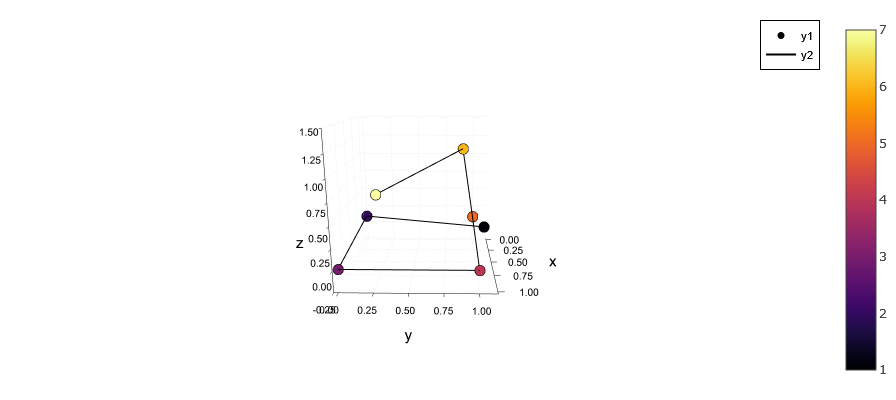

In [6]:
newQ = dihedralRotate(newQ,4,-pi/4)
fig = Plots.plot(zlim=(-0.25,1.5))
plotChain!(newQ)
display(fig)

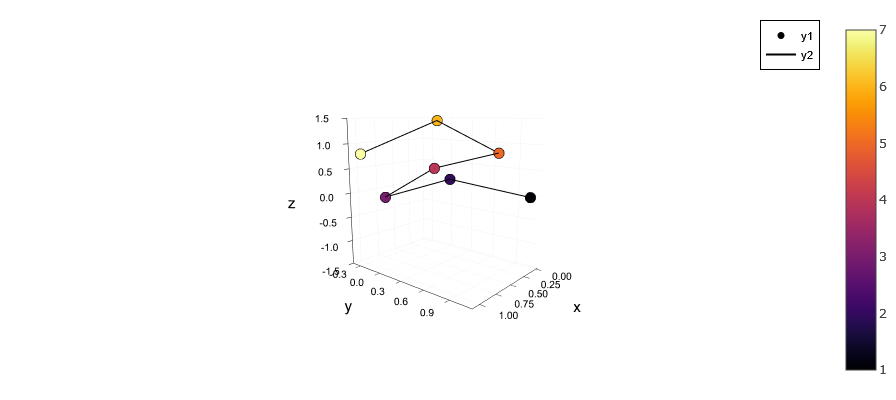

In [7]:
newQ = dihedralRotate(newQ,1,pi/4)
fig = Plots.plot(zlim=(-1.5,1.5))
plotChain!(newQ)
display(fig)

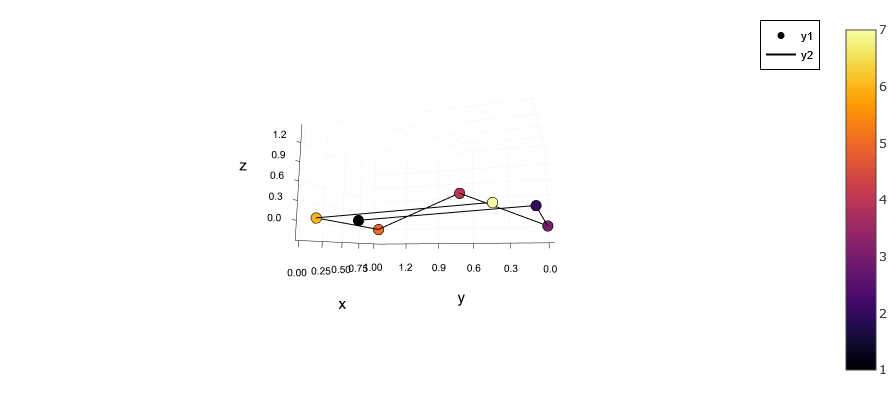

In [8]:
newQ = copy(Q)
newQ = dihedralRotate(newQ,4,-pi/4)
newQ = dihedralRotate(newQ,3,pi/2)
newQ = dihedralRotate(newQ,1,pi/4)
newQ = dihedralRotate(newQ,2,-pi/2)
fig = Plots.plot(zlim=(-0.3,1.5))
plotChain!(newQ)
display(fig)

In [32]:
newQ = fourKnot(1.1)
stepsize = pi/1000
diheds = [4,3,2,1]
factor = [-1/4,1/2,1/4,-1/2]
ener = []
for t in 1:1000
    for i in 1:4
        flag = checkRotationIntersection(newQ,diheds[i],factor[i]*stepsize)
        push!(ener,demaineEnergy2(newQ))
        if !flag
            newQ = dihedralRotate(newQ,diheds[i],factor[i]*stepsize)
        else
            println(t)
            println(i)
        end
    end
end

375
4
376
4
377
4
378
4
379
4
380
4
381
4
383
2
383
3
384
2
385
2


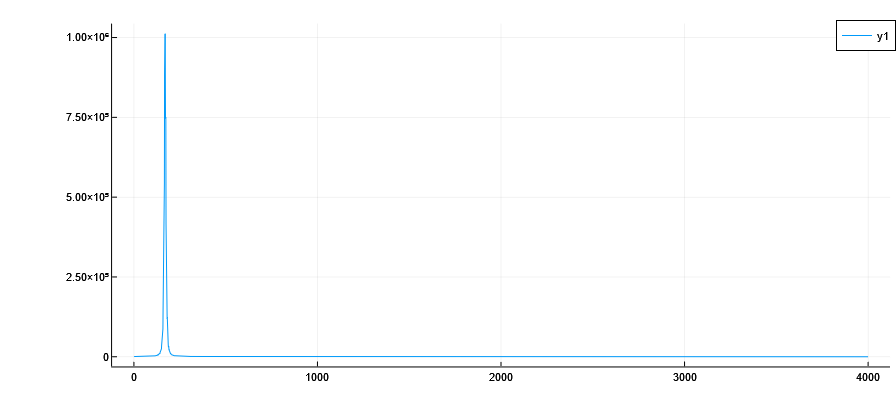

In [24]:
plot(1:4000,ener)

In [18]:
ener[1990]

36.83526035243611489224362561352543256097181525575097009192039223473553622111834

In [48]:
newQ = fourKnot(1.1)
stepsize = pi/1000
diheds = [4,3,2,1]
factor = [-1/4,1/2,1/4,-1/2]
ener = []
for t in 1:40
    for i in 1:4
        flag = checkRotationIntersection(newQ,diheds[i],factor[i]*stepsize)
        push!(ener,tangentEnergy(newQ))
        if !flag
            newQ = dihedralRotate(newQ,diheds[i],factor[i]*stepsize)
        else
            println(t)
            println(i)
        end
    end
end

In [49]:
ener[end]

730602.6922070026735097552719356066243203777844147543716775167734868415073356967

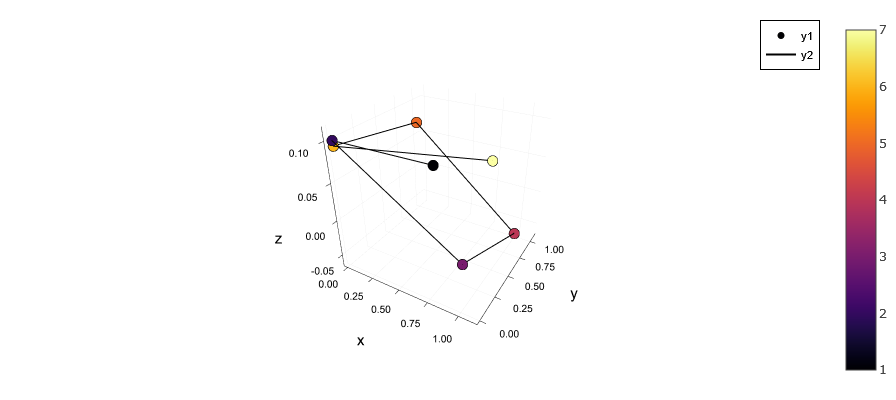

In [50]:
p = plot()
plotChain!(newQ)
display(p)

In [35]:
lens,bangs,dangs = lengthsAndAngles(newQ)

(BigFloat[1.109053651880224990535398426176956260766538390292492498541468184003374521706278, 1.004987566455019137359957560787362974164612176607265526452749544997161380364717, 0.9999999953758043302402351440112082712249894822107509470319756379542576428532073, 1.00498756083227165627203421891077575798404050868527599146273676144370438267723, 1.004987562957606561147905287661623891624508209864648451782744702786996243889809, 1.109053657204991214823732641844273963170087368985840635693200532624817994412544], BigFloat[1.471943979384674391757252118215687770599113121741455535292773341276222941278499, 1.570796323357063029264059826609466519363146957185679141805441019731493355323114, 1.570796340389423749524279466897781958723021649331880704142831645582993769834125, 1.560895171831525731601568692674020527952215711299661277380890054395375324614781, 1.471943979091493911049336431490002775203701829643806293593408559725039083224295], BigFloat[-0.50624483896015756332618975936420651872645243855838198414894669500

In [36]:
lens

6-element Vector{BigFloat}:
 1.109053651880224990535398426176956260766538390292492498541468184003374521706278
 1.004987566455019137359957560787362974164612176607265526452749544997161380364717
 0.9999999953758043302402351440112082712249894822107509470319756379542576428532073
 1.00498756083227165627203421891077575798404050868527599146273676144370438267723
 1.004987562957606561147905287661623891624508209864648451782744702786996243889809
 1.109053657204991214823732641844273963170087368985840635693200532624817994412544

In [37]:
bangs

5-element Vector{BigFloat}:
 1.471943979384674391757252118215687770599113121741455535292773341276222941278499
 1.570796323357063029264059826609466519363146957185679141805441019731493355323114
 1.570796340389423749524279466897781958723021649331880704142831645582993769834125
 1.560895171831525731601568692674020527952215711299661277380890054395375324614781
 1.471943979091493911049336431490002775203701829643806293593408559725039083224295

In [38]:
dangs

4-element Vector{BigFloat}:
 -0.5062448389601575633261897593642065187264524385583819841489466950024785757747657
  0.2937389014074404122267730211024880709092323612350519313211988016871684628681536
  0.4883005750177076976571177004239935526358678717800977632646927793862044102992856
 -0.1133286763791763805765895008885488726541521749169170366101020503790342061718179

In [39]:
help = PolygonalChain(lens,bangs,dangs)

PolygonalChain(Point[Point(0.0, 0.0, 0.0), Point(1.109053651880224990535398426176956260766538390292492498541468184003374521706278, 0.0, 0.0), Point(1.009869989759594185926055269477769491079497374393163471501970810484331372427493, 1.000081301643782385624926021223563008882090988177480900078003317107875902615306, 0.0), Point(0.139568044693503611616629436404900989250254472040560939290747880726230609074645, 0.9137685814924671000456414622460660437480862318617437331454134296957271524317804, -0.4848965142232607123871547716441665963258166516788137478633244962882874163991596), Point(0.09409851063905362919342670132603071594638157336803652568193187490738371685595323, -0.05740201192609473789708824490820085187691094591630516644814906968842139675266466, -0.2304162647351941727200916041052801580928521171358005269938515077447481481905849), Point(0.6357228358475025824013737071046441157881838089572165381200768194247649986310257, 0.143052584735000086542808579221251353603921810599623981084945657975499779769

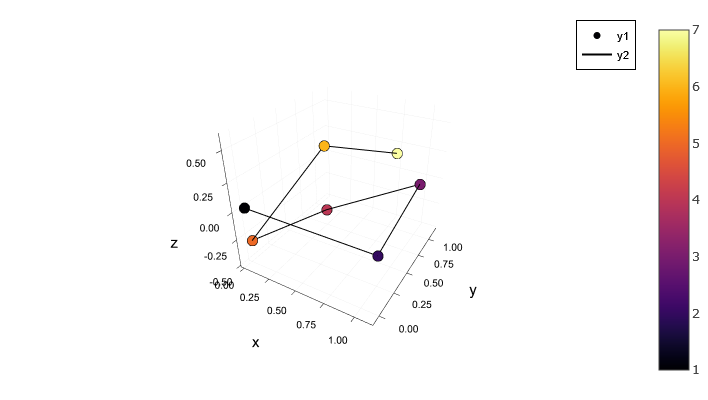

In [40]:
p = plot()
plotChain!(help)
display(p)